In [1]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload

In [2]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

from bgspy.likelihood import SimplexModel
from bgspy.utils import load_pickle
from bgspy.optim import optim_plot
from bgspy.optim import equality_constraint_function, inequality_constraint_functions

/home/vsb/projects/bprime/bgspy/likelihood.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [3]:
plt.show()
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

# MLE Diagnostics

### Merged Model

This is the simplest model, all CDS+phastcons+UTRs are merged into a single conserved feature type. The mixture with UTRs adds some complexity, since these are much less conserved.

In [4]:
fmd = load_pickle('../fits/hg38_cds_utrs_phastcons_merged_simplex/model_data.pkl')

In [5]:
gm, Y, bgs_bins, features, bp = fmd['gm'], fmd['Y'], fmd['bgs_bins'], fmd['gm'], fmd['bp']

In [6]:
features = gm.features

In [7]:
gm.w

array([1.00000000e-11, 6.30957344e-11, 3.98107171e-10, 2.51188643e-09,
       1.58489319e-08, 1.00000000e-07])

In [8]:
1e-12/1e-8

9.999999999999999e-05

In [9]:
mb = SimplexModel(w=gm.w, t=gm.t, logB=bp, Y=Y,
                   bins=bgs_bins, features=features) 

In [13]:
%%time
mb.fit(ncores=50, starts=100, start_pi0=0.0015, start_mu=3e-8, algo='GN_ISRES')

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 351 ms, sys: 9.23 s, total: 9.58 s
Wall time: 19min 19s


In [14]:
mb

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778980595.6865
π0 = 0.0015826206628444938
μ = 3.251871124861156e-08
R² = 66.6211
W = 
          undefined
------  -----------
1e-07         0.076
1e-06         0
1e-05         0
0.0001        0
0.001         0.196
0.01          0.083
0.1           0.643

In [12]:
mb

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 324413518838.3091
π0 = 0.001244682502517147
μ = 4.531185456558197e-08
R² = 67.2364
W = 
          undefined
------  -----------
1e-07         0.194
1e-06         0.06
1e-05         0.021
0.0001        0.006
0.001         0.166
0.01          0.123
0.1           0.429

In [ ]:
%%time 
m_b.fit(ncores=50, starts=2000, start_pi0=0.0015, start_mu=3e-8, algo='GN_ISRES')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [12]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778981134.79486
π0 = 0.0015828847741328883
μ = 3.004491975885917e-08
R² = 66.6259
W = 
          undefined
------  -----------
1e-07         0
1e-06         0.001
1e-05         0
0.0001        0
0.001         0.215
0.01          0.084
0.1           0.701

In [14]:
m_b.optim

OptimResult
  termination code: xtol reached
  stats: {'xtol reached': 1992, 'max eval': 8} (prop success: 100.0%)
  negative log-likelihood = 322778981134.79486
  theta = [1.58288477e-03 3.00449198e-08 3.60169419e-04 5.06109943e-04
 2.42576328e-05 2.81284967e-04 2.14794012e-01 8.35385118e-02
 7.00650041e-01]

In [11]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778994608.46765
π0 = 0.001582883595483872
μ = 4.496758587745205e-08
R² = 66.6214
W = 
          undefined
------  -----------
1e-07         0.313
1e-06         0.018
1e-05         0
0.0001        0
0.001         0.142
0.01          0.061
0.1           0.465

In [50]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778986520.9623
π0 = 0.0015824358718647073
μ = 3.281030904802272e-08
R² = 66.6248
W = 
          undefined
------  -----------
1e-07         0.071
1e-06         0.014
1e-05         0
0.0001        0
0.001         0.196
0.01          0.079
0.1           0.639

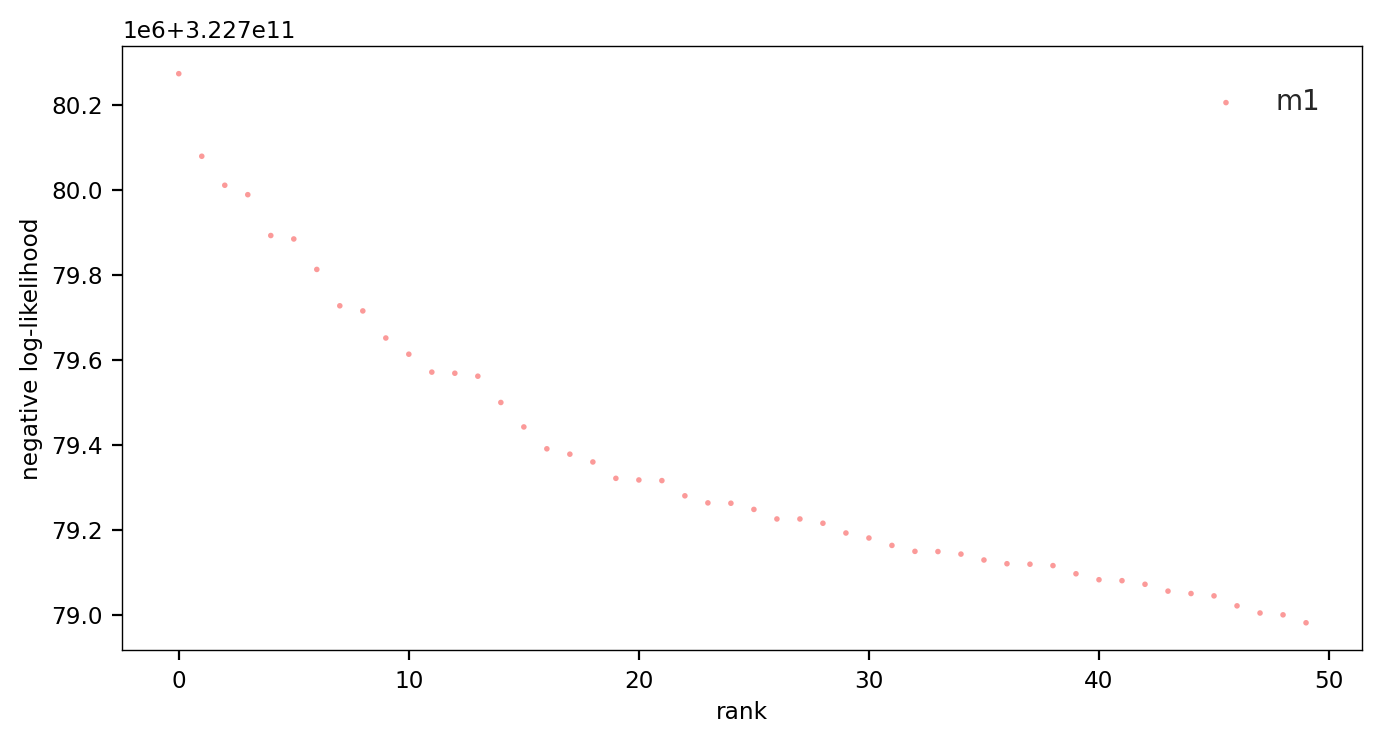

In [17]:
optim_plot(m1=mb.optim)

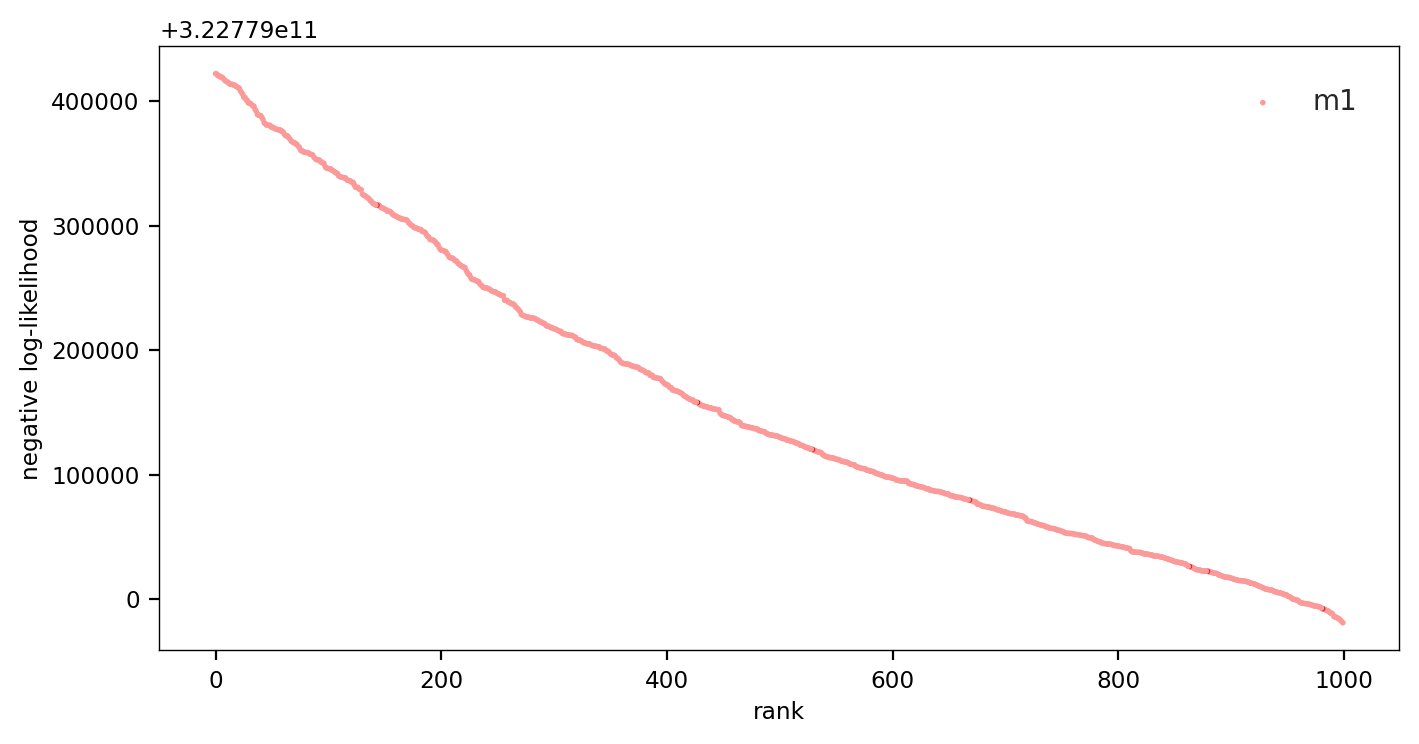

In [13]:
optim_plot(m1=m_b.optim)

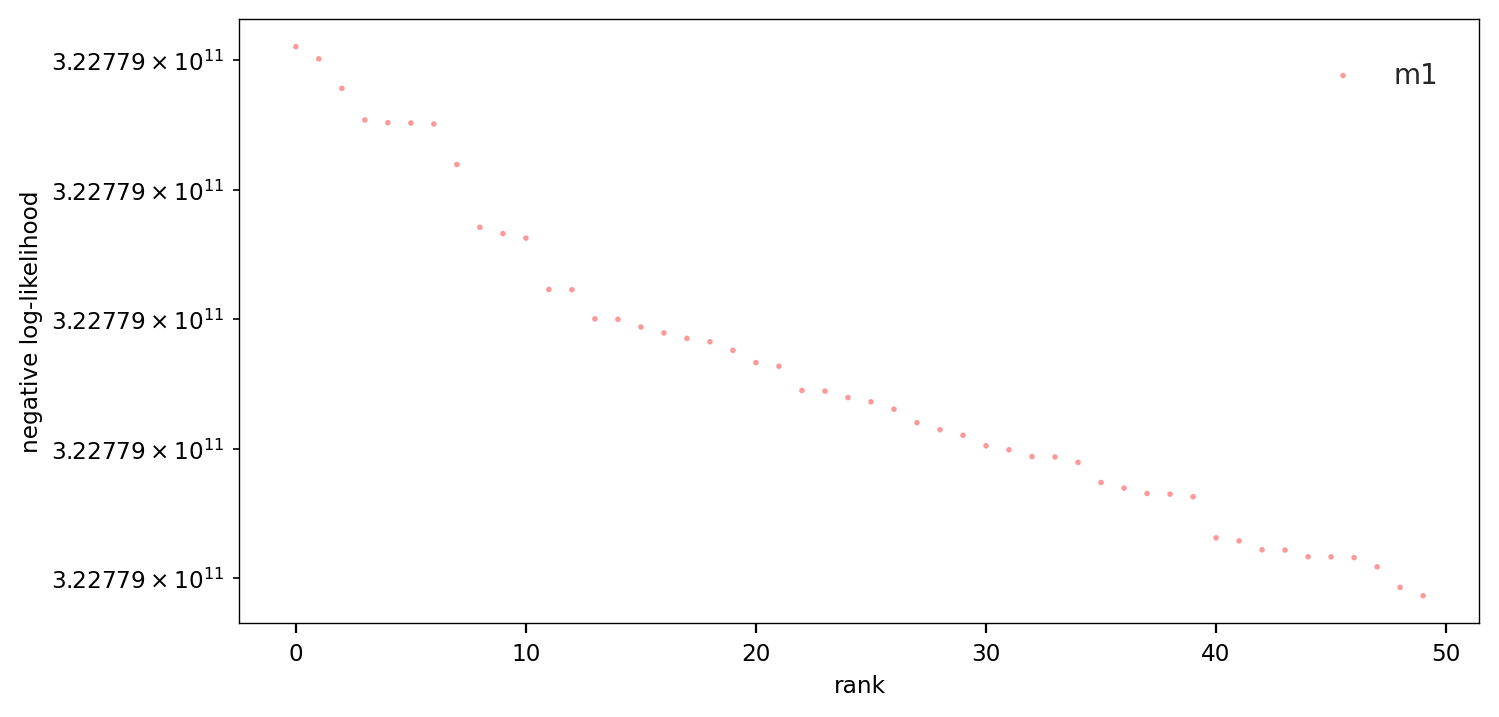

In [56]:
optim_plot(m1=m_b.optim)

In [15]:
m_b.fit(ncores=50, starts=1, start_pi0=0.0015, start_mu=3e-8, algo='GN_ISRES')

  0%|          | 0/1 [00:00<?, ?it/s]

> /home/vsb/projects/bprime/bgspy/optim.py(188)nlopt_simplex_worker()
    186     log10_mu_bounds = bounds[0][1], bounds[1][1]  # TODO CHECK
    187     __import__('pdb').set_trace()
--> 188     hl, hu = inequality_constraint_functions(nt, nf, mu=mu, 
    189                                              log10_mu_bounds=log10_mu_bounds)
    190     # tolerances for inequality constraint



ipdb>  log10_mu_bounds


(1e-11, 1e-07)


ipdb>  exit


BdbQuit: 

### CDS + UTRs + Phastcons Model

In [ ]:
fd = load_pickle('../fits/hg38_cds_utrs_phastcons_simplex/model_data.pkl')
gm, Y, bgs_bins, features, bp = fd['gm'], fd['Y'], fd['bgs_bins'], fd['gm'], fd['bp']

In [32]:
10**np.array(tuple(np.log10((0.0005, 0.005))))

array([0.0005, 0.005 ])

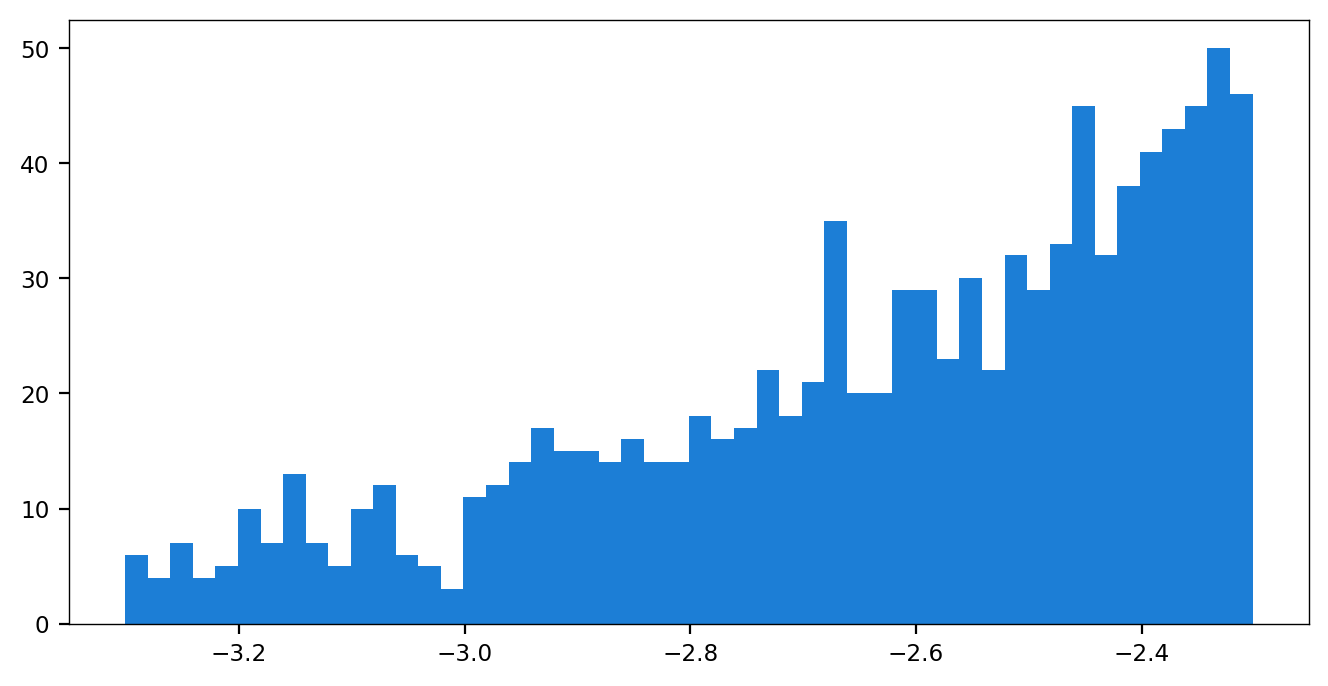

In [44]:
_ = plt.hist(np.log10([m_b.random_start()[0] for x in range(1000)]), 50)

In [39]:
from bgspy.data import pi_from_pairwise_summaries
pi_from_pairwise_summaries(Y.sum(axis=0))

0.001052746703898515

In [18]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322791293316.3191
π0 = 0.0015787476785369746
μ = 6.407820745658771e-08
R² = 66.2317
W = 
          undefined
------  -----------
1e-07         0.022
1e-06         0.393
1e-05         0.127
0.0001        0
0.001         0.064
0.01          0.112
0.1           0.281

In [21]:
m_b

MLE (interpolated w): 6 x 7 x 3
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322741693444.99133
π0 = 0.001559728773284351
μ = 3.855877895183788e-08
R² = 67.8068
W = 
          cds    phastcons    utr
------  -----  -----------  -----
1e-07   0.32         0.055  0.241
1e-06   0.228        0.007  0.202
1e-05   0.008        0.003  0.133
0.0001  0.001        0.001  0.02
0.001   0.001        0.148  0.063
0.01    0.266        0.414  0.196
0.1     0.177        0.372  0.146

In [10]:
%%time
m_b.fit(ncores=70, starts=100, algo='GN_ISRES')

  0%|          | 0/100 [00:00<?, ?it/s]

Process ForkPoolWorker-140:
Process ForkPoolWorker-136:
Process ForkPoolWorker-117:
Process ForkPoolWorker-88:
Process ForkPoolWorker-125:


KeyboardInterrupt: 